# Preparing a two class and five class dataset from CIFAR-10

#### As we need CIFAR-10 dataset for two class and five class classification problem so Let's prepare our data from original 10 class dataset of CIFAR-10

Data was downloaded from the follwing website :
    http://www.cs.toronto.edu/~kriz/cifar.html
    
    
Data downloaded from the above link will have folder named "cifar-10-python" after extracting the zip files ...
Put that folder in the same directory as this .ipynb file

Whole notebook can be run at once given all the path directories are set correctly (see cell 3 and 23)

In [1]:
############### some necessary update ###################
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import random
from skimage.feature import hog

LOG = True   ### if this is set true, prepared data will be written in disk in csv file

In [2]:
# function to unpickle the original encoded data files(taken from CIFAR-10 dataset page)
def unpickle(file):
    with open(file, 'rb') as fo:
        dictionary = pickle.load(fo, encoding='bytes')
    return dictionary

Extracted folder named "cifar-10-python" is in current directory. So we are reading all five batches of training data
and one batch of test data. Class names are also in batches.meta file.

In [3]:
# training data
batch1 = unpickle('./cifar-10-python/cifar-10-batches-py/data_batch_1')
batch2 = unpickle('./cifar-10-python/cifar-10-batches-py/data_batch_2')
batch3 = unpickle('./cifar-10-python/cifar-10-batches-py/data_batch_3')
batch4 = unpickle('./cifar-10-python/cifar-10-batches-py/data_batch_4')
batch5 = unpickle('./cifar-10-python/cifar-10-batches-py/data_batch_5')
# testing data
test_batch = unpickle('./cifar-10-python/cifar-10-batches-py/test_batch')
# class names
classes = unpickle('./cifar-10-python/cifar-10-batches-py/batches.meta')

In [4]:
# to see how data is structured
print("Keys of the dictionary we unpickled :::::::: ",batch1.keys())

Keys of the dictionary we unpickled ::::::::  dict_keys([b'batch_label', b'labels', b'data', b'filenames'])


In [5]:
# to see all batches downloaded are good to go.
print(batch1[b'batch_label'])
print(batch2[b'batch_label'])
print(batch3[b'batch_label'])
print(batch4[b'batch_label'])
print(batch5[b'batch_label'])
print(test_batch[b'batch_label'])

b'training batch 1 of 5'
b'training batch 2 of 5'
b'training batch 3 of 5'
b'training batch 4 of 5'
b'training batch 5 of 5'
b'testing batch 1 of 1'


In [6]:
# merging all five training batches to a single numpy array
train_labels = np.concatenate((np.array(batch1[b'labels']).reshape(-1, 1),
                               np.array(batch2[b'labels']).reshape(-1, 1), np.array(batch3[b'labels']).reshape(-1, 1), 
                               np.array(batch4[b'labels']).reshape(-1, 1), np.array(batch4[b'labels']).reshape(-1, 1)),
                               axis = 0)



train_pixels = np.concatenate((np.array(batch1[b'data']),
                               np.array(batch2[b'data']), np.array(batch3[b'data']), 
                               np.array(batch4[b'data']), np.array(batch4[b'data'])), axis = 0)

full_train_data = np.concatenate((train_pixels, train_labels), axis = 1)  # also combining pixels and labels in single array

In [7]:
# doing same for the test batch
full_test_data = np.concatenate((np.array(test_batch[b'data']), np.array(test_batch[b'labels']).reshape(-1, 1)), axis = 1)

In [8]:
# cross validating the train and test size d
print(train_labels.shape)
print(train_pixels.shape)
print(full_train_data.shape)
print(full_test_data.shape)

(50000, 1)
(50000, 3072)
(50000, 3073)
(10000, 3073)


In [9]:
# to see how class name are structured in given file
print(classes.keys())

dict_keys([b'num_cases_per_batch', b'label_names', b'num_vis'])


In [10]:
# to see what classes are present
print(classes[b'label_names'])

[b'airplane', b'automobile', b'bird', b'cat', b'deer', b'dog', b'frog', b'horse', b'ship', b'truck']


In [11]:
# list of class name in the same sequence
label_names = ['airplane','automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

## Lets us visualize some pictures from our dataset

In [12]:
# our pixels were in rows.. this function reshapes them into proper format to use them in imshow function of matplotlib.pyplot
def im_convert(pixel_array):
    image = np.transpose(pixel_array.reshape(3, 32, 32), (1, 2, 0))
    
    return image
    

In [13]:
# this function takes "data" as we prepared above from train and test and plots 20 random pictures from it
# along with their labels
def show_samples(data):
    fig = plt.figure(figsize = (25, 7))

    # Let's see some picture and their labels
    for index in range(20):
        temp = random.randint(0, len(data)) # picking up some random rows(pictures)
        ax  = fig.add_subplot(2, 10, index + 1)
        plt.imshow(im_convert(data[temp, 0: 3072]))
        ax.set_title(label_names[np.squeeze(data[temp, 3072])])

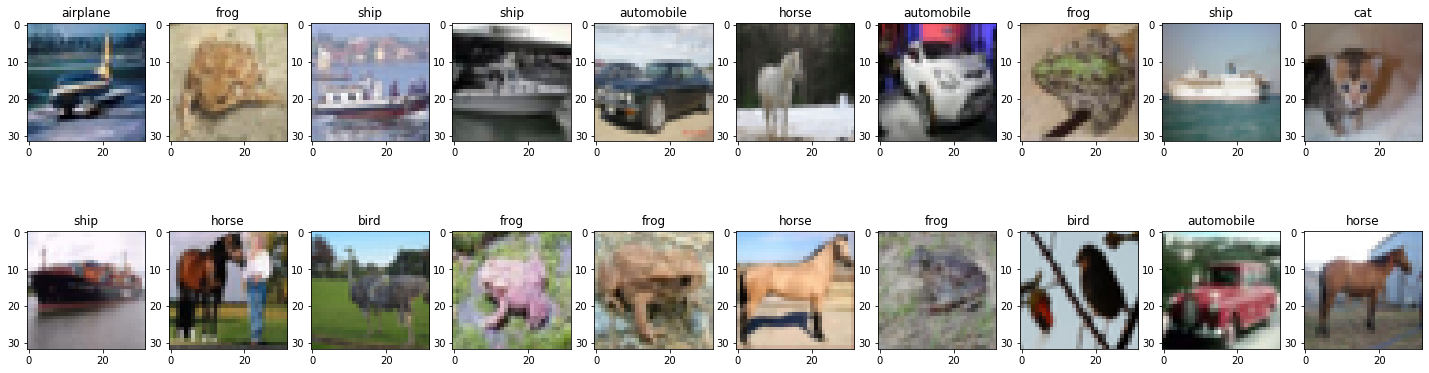

In [14]:
# show some samples from train data set
show_samples(full_train_data)

## Let us now make this data in the form binary class and 5 class dataset

In [15]:
# pandas will make data manupulation easier so let's put the arrays into dataframes
train = pd.DataFrame(full_train_data)
test = pd.DataFrame(full_test_data)

In [16]:
# Let's see the dataframe head
train.head()

,0,1,2,3,4,5,6,7,8,9,...,3063,3064,3065,3066,3067,3068,3069,3070,3071,3072
0,59,43,50,68,98,119,139,145,149,149,...,58,65,59,46,57,104,140,84,72,6
1,154,126,105,102,125,155,172,180,142,111,...,42,67,101,122,133,136,139,142,144,9
2,255,253,253,253,253,253,253,253,253,253,...,83,80,69,66,72,79,83,83,84,9
3,28,37,38,42,44,40,40,24,32,43,...,39,59,42,44,48,38,28,37,46,4
4,170,168,177,183,181,177,181,184,189,189,...,88,85,82,83,79,78,82,78,80,1


In [17]:
# creating a separate dataframe which only contains only class-0 and class-1 (basically binary class dataset)
binary_train = train[(train[3072] == 0) | (train[3072] == 1)]
binary_test = test[(test[3072] == 0) | (test[3072] == 1) ]

In [18]:
# checking binary dataset dataframe
binary_train.head()

,0,1,2,3,4,5,6,7,8,9,...,3063,3064,3065,3066,3067,3068,3069,3070,3071,3072
4,170,168,177,183,181,177,181,184,189,189,...,88,85,82,83,79,78,82,78,80,1
5,159,150,153,154,138,184,154,77,61,64,...,18,16,12,13,16,14,14,17,19,1
29,202,202,204,206,208,209,210,212,213,215,...,149,174,195,212,227,237,243,243,243,0
30,126,122,126,127,130,130,132,133,130,132,...,117,117,116,114,113,111,109,107,102,0
32,50,51,42,62,100,66,29,20,18,11,...,169,160,156,165,167,165,166,166,162,1


In [19]:
# to check two class dataset size
print(binary_train.shape)
print(binary_test.shape)

(9938, 3073)
(2000, 3073)


In [20]:
# creating a separate dataframe which only contains only class-0, class-1, class-2
# class-3, class-4 (basically five class dataset)
five_class_train = train[(train[3072] == 0) | (train[3072] == 1) | (train[3072] == 2) | (train[3072] == 3) | (train[3072] == 4)]
five_class_test = test[(test[3072] == 0) | (test[3072] == 1) | (test[3072] == 2) | (test[3072] == 3) | (test[3072] == 4)]

In [21]:
# see the head of five class dataset
five_class_train.head()

,0,1,2,3,4,5,6,7,8,9,...,3063,3064,3065,3066,3067,3068,3069,3070,3071,3072
3,28,37,38,42,44,40,40,24,32,43,...,39,59,42,44,48,38,28,37,46,4
4,170,168,177,183,181,177,181,184,189,189,...,88,85,82,83,79,78,82,78,80,1
5,159,150,153,154,138,184,154,77,61,64,...,18,16,12,13,16,14,14,17,19,1
6,164,105,118,129,134,146,166,183,199,174,...,71,48,58,64,48,41,29,26,44,2
9,125,110,102,106,106,141,175,175,148,106,...,62,67,70,75,79,81,82,84,86,3


In [22]:
# to check our five class dataset size
print(five_class_train.shape)
print(five_class_test.shape)

(24994, 3073)
(5000, 3073)


### Make a directory named "data" in the current directory and write the csv files of the dataset

In [23]:
!mkdir data   # making a new directory 'data' in current directory

In [24]:
# if LOG is set to be true in the top of this note book (see Cell 1) the csv file will be written into disk
if LOG:
    print('Writing the data to disk')
    binary_train.to_csv('./data/binary_train.csv', index = False)
    binary_test.to_csv('./data/binary_test.csv', index = False)

    five_class_train.to_csv('./data/five_class_train.csv', index = False)
    five_class_test.to_csv('./data//five_class_test.csv', index = False)
    print('data is writte to disk')

Writing the data to disk
data is writte to disk


## Let's us visualize all the newly prepared dataset

In [25]:
binary_train.shape

(9938, 3073)

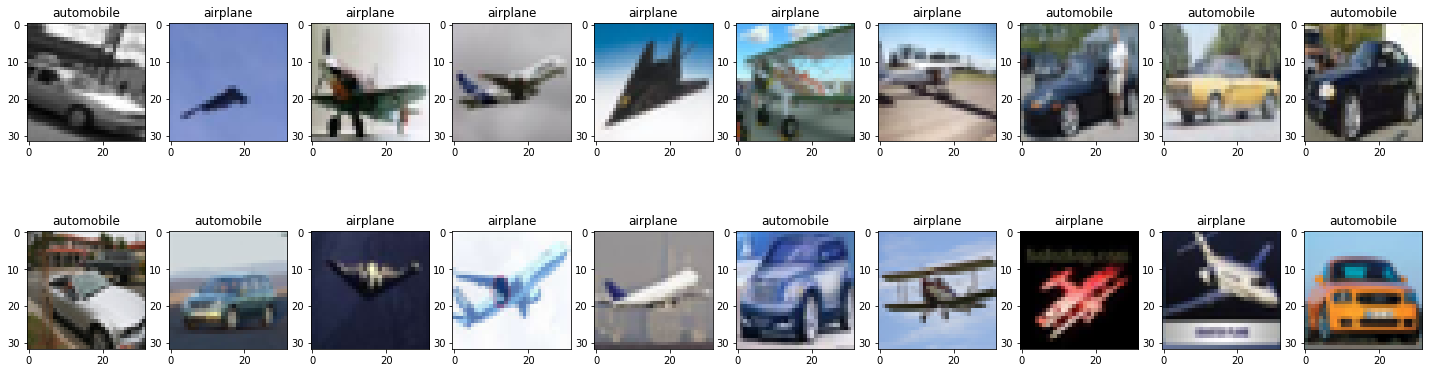

In [26]:
###  Binary class training data
show_samples(np.array(binary_train))

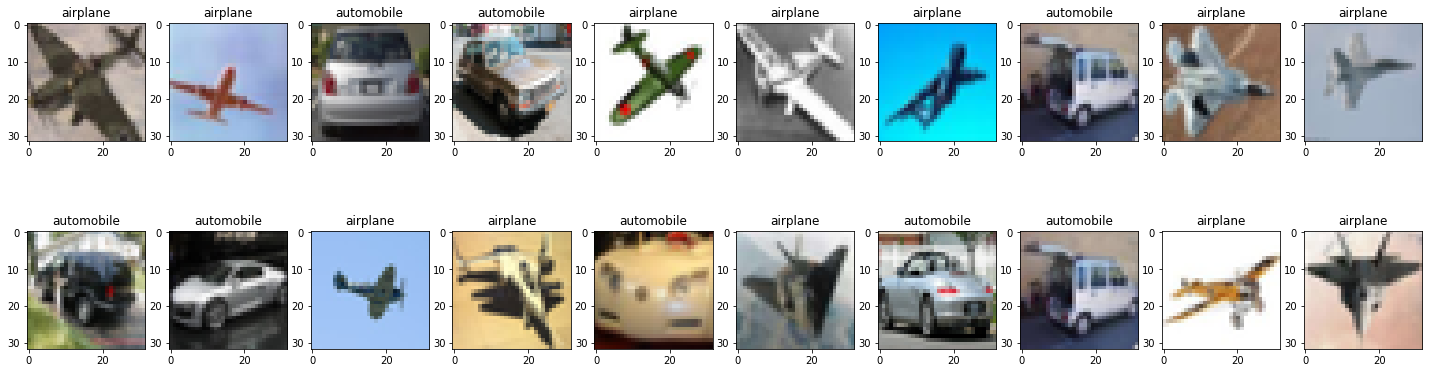

In [27]:
# binary class test data
show_samples(np.array(binary_test))

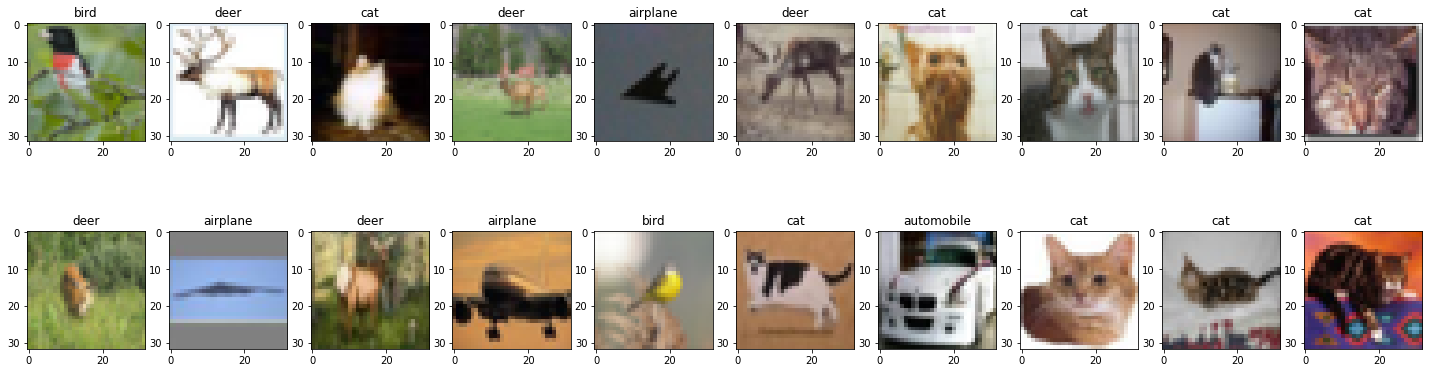

In [28]:
# five class train data
show_samples(np.array(five_class_train))

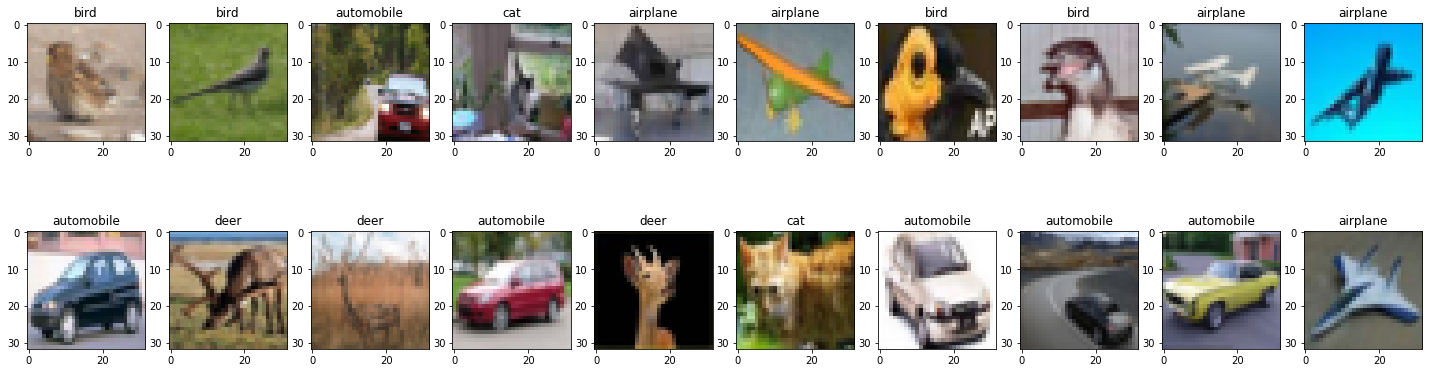

In [29]:
### give class test data
show_samples(np.array(five_class_test))

In [30]:
#This function takes normal dataframe containing pixels and corresponding labels and returns it's hog 144 features
# and Label
def hog_features(dataframe):
    dataframe = np.array(dataframe)
    features = []
    for i in range(len(dataframe)):
        image = im_convert(dataframe[i, 0:3072])   ## to get it in the proper image shape
        fd = hog(image, orientations= 9, pixels_per_cell=(8, 8),
                cells_per_block=(1, 1), visualize=False, multichannel=True)   ## getting hog feature using skimage library

        features.append(list(fd))  ## appending extracted features to list
    hogft = np.array(features)
    hog_dataframe = pd.DataFrame(np.concatenate((hogft, dataframe[:, 3072].reshape(-1,1)), axis = 1)) # adding labels and puting it in dataframe
    
    return hog_dataframe

In [31]:
# getting hog features for binary class dataset
bin_train = hog_features(binary_train)
bin_test =  hog_features(binary_test)

In [32]:
# getting hog features for five class dataset
five_train = hog_features(five_class_train)
five_test = hog_features(five_class_test)

In [33]:
# Let's see what shape of dataset we got
print(bin_train.shape)
print(bin_test.shape)
print(five_train.shape)
print(five_test.shape)

(9938, 145)
(2000, 145)
(24994, 145)
(5000, 145)


We have obtained Hog144 features for each image. 145th values is label of corresponding Hog features.

In [34]:
# Writing hog features to disk in csv format for binary dataset
if LOG:
    bin_test.to_csv('./data/bin_hog_test.csv', index = False)
    bin_train.to_csv('./data/bin_hog_train.csv', index = False)
    print("Binary Hog features Loaded into disk")

Binary Hog features Loaded into disk


In [35]:
# doing same for five class dataset
if LOG:
    five_test.to_csv('./data/five_hog_test.csv', index = False)
    five_train.to_csv('./data/five_hog_train.csv', index = False)
    print("Five class hog features are loaded into disk")
    

Five class hog features are loaded into disk


## We have prepared our dataset. It is in following format.

<p> Follwing file have been written in the disk.</p>
 <ul>
    <li><b>Normal pixel values for binary train and test dataset</b></li>
    <ul> 
        <li> <i>binary_train.csv</i> </li>
        <li> <i>binary_test.csv</i> </li>
    </ul>
    <li><b>Hog 144 feature values for binary train and test dataset</b></li>
    <ul> 
        <li> <i>bin_hog_train.csv</i> </li>
        <li> <i>bin_hog_test.csv</i> </li>
    </ul>
  <li><b>Normal pixel values for five class train and test dataset</b></li>
    <ul> 
        <li> <i>five_class_train.csv</i> </li>
        <li> <i>five_class_test.csv</i> </li>
    </ul>
    <li><b>Hog 144 feature values for five class test dataset</b></li>
    <ul> 
        <li> <i>binary_hog_train.csv</i> </li>
        <li> <i>five_hog_train.csv</i> </li>
    </ul>
</ul> 

<h1> ########################       THE END     ###########################</h1>